#### To predict whether a hotel booking will be canceled and identify the key factors influencing cancellations, we believe the following variables from the dataset are worth examining:

1. __lead_time__: Longer lead times (time between booking and arrival) might increase the likelihood of cancellations due to changes in guest plans.
2. __stays_total_nights__: The length of stay might impact cancellations; shorter stays might be more prone to changes or cancellations.
3. __adults, children,__ and __babies__: The number of people in the booking (especially families) might influence the likelihood of cancellation.
4. __market_segment__: This captures whether the booking came through a direct channel, travel agent, or corporate contract, which could influence cancellation rates.
5. __distribution_channel__: The platform through which the booking was made (e.g., online travel agency, direct) could also affect cancellation behavior.
6. __is_repeated__: Repeat guests may be less likely to cancel their bookings compared to first-time customers.
7. __previous_cancellations__ and __previous_booking_not_canceled__: Customers with a history of canceling bookings are more likely to cancel again.
8. __deposit_type__: Whether a deposit was required or not (e.g., non-refundable deposits may reduce cancellations).
9. __days_in_waiting_list__: Bookings placed on a waiting list might have a higher likelihood of being canceled.
10. __customer_type__: Different types of customers (transient, group, contract) might have varying cancellation patterns.
11. __adr__ (Average Daily Rate): The cost of the booking might influence cancellation behavior, with higher rates possibly leading to a higher cancellation rate if guests find cheaper alternatives.
13. __total_of_special_requests__ and __meal__: A higher number of special requests or a more expensive meal plan may indicate more committed guests, potentially reducing cancellations.
12. __required_car_parking_spaces__: This could suggest guests traveling by car, which might correlate with lower cancellation rates compared to guests relying on flights or other transport.


In [2]:
#import packages
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
hotel  = pd.read_csv('data\cleaned_hotel_booking.csv')

In [4]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116295.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000
mean,0.375988,105.250140,2016.159795,15.793438,27.173278,0.934092,2.515069,3.449161,1.860738,0.105035,0.007807,0.027885,0.087146,0.126467,0.215170,2.300966,103.613414,0.062881,0.574846
std,0.484379,107.165262,0.706848,8.781755,13.519197,0.994956,1.889987,2.529851,0.482390,0.400719,0.096941,0.164644,0.852407,1.453132,0.632961,17.593392,49.153444,0.246022,0.792964
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,8.000000,16.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,16.000000,28.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,23.000000,38.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,31.000000,53.000000,19.000000,50.000000,69.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

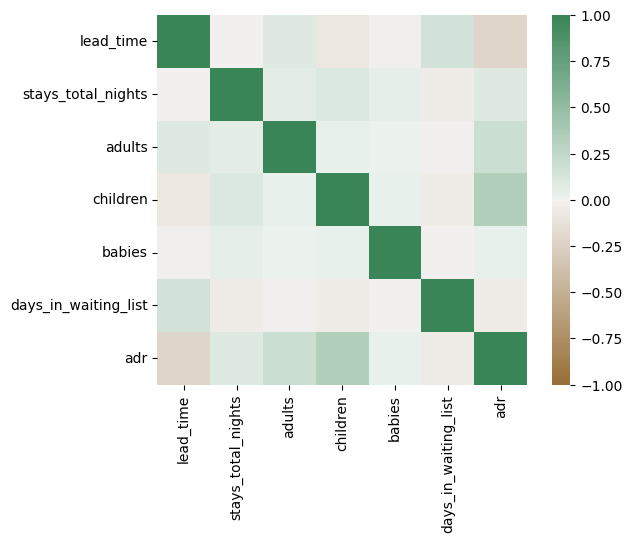

In [5]:
#creating a correlation chart with numeric type variables for records with cancellations

corr_hotel = hotel[['is_canceled', 'lead_time', 'stays_total_nights', 'adults', 'children', 'babies', 'days_in_waiting_list', 'adr']].copy()
corr_hotel = corr_hotel[corr_hotel['is_canceled'].isin([1])]
corr_hotel = corr_hotel.drop('is_canceled', axis=1)
corr = corr_hotel.corr()
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(50, 500, n=500), square=True)


<Axes: >

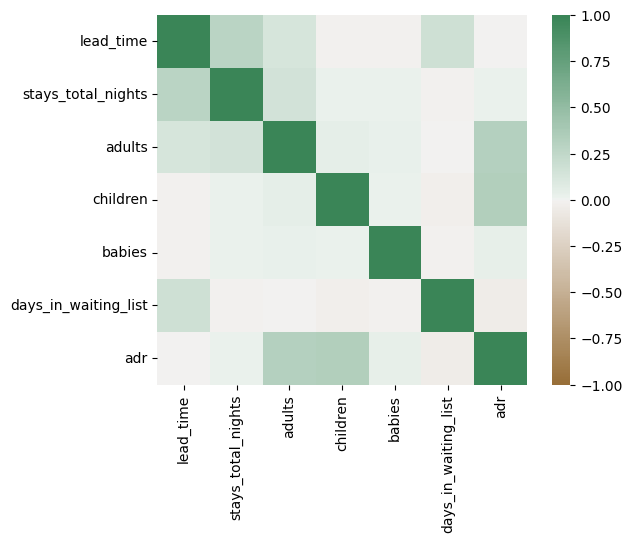

In [6]:
#creating a correlation chart with numeric type variables for records with where there wasn't a cancellation

corr_hotel = hotel[['is_canceled', 'lead_time', 'stays_total_nights', 'adults', 'children', 'babies', 'days_in_waiting_list', 'adr']].copy()
corr_hotel = corr_hotel[corr_hotel['is_canceled'].isin([0])]
corr_hotel = corr_hotel.drop('is_canceled', axis=1)
corr = corr_hotel.corr()
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(50, 500, n=500), square=True)

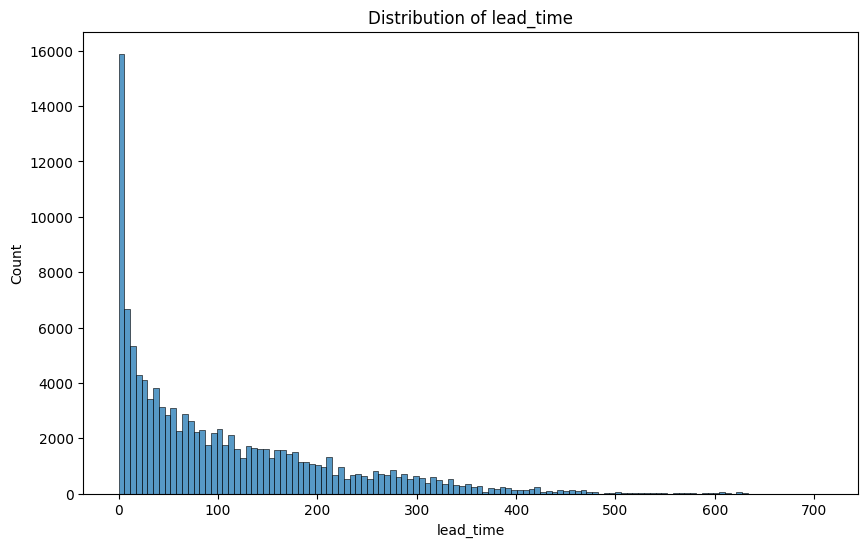

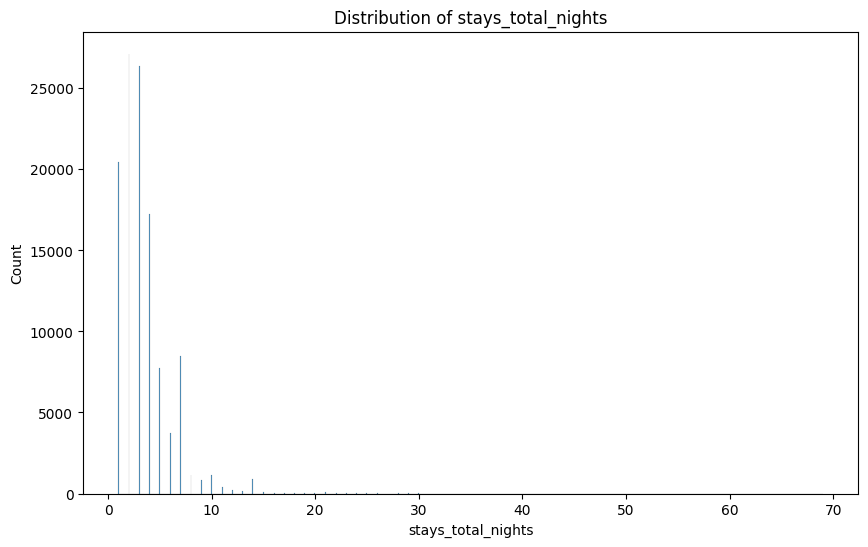

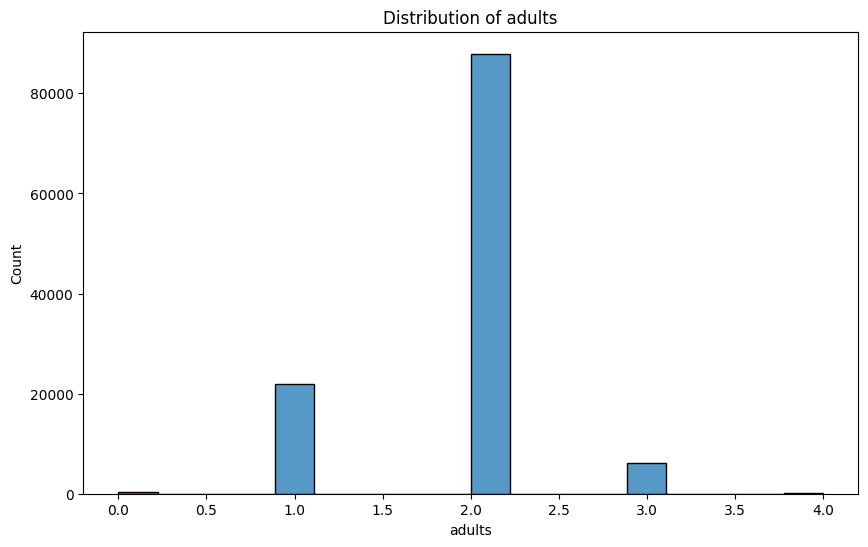

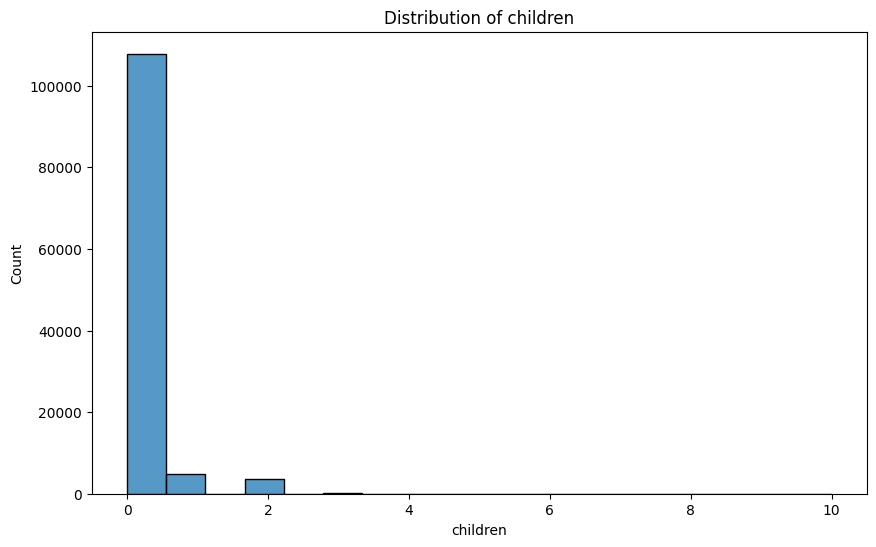

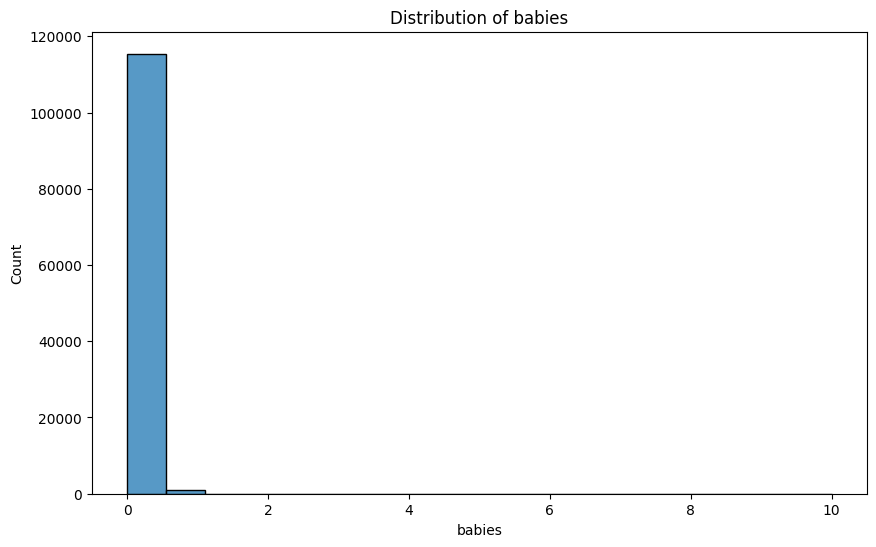

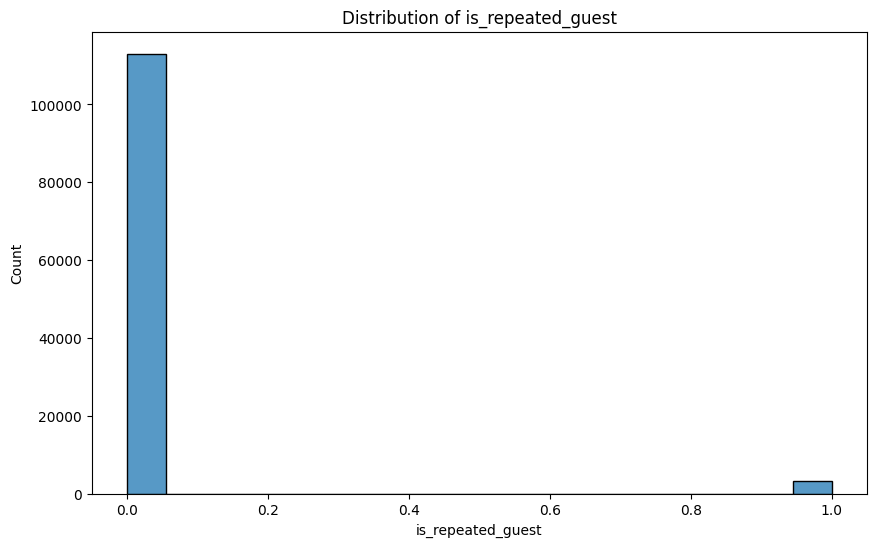

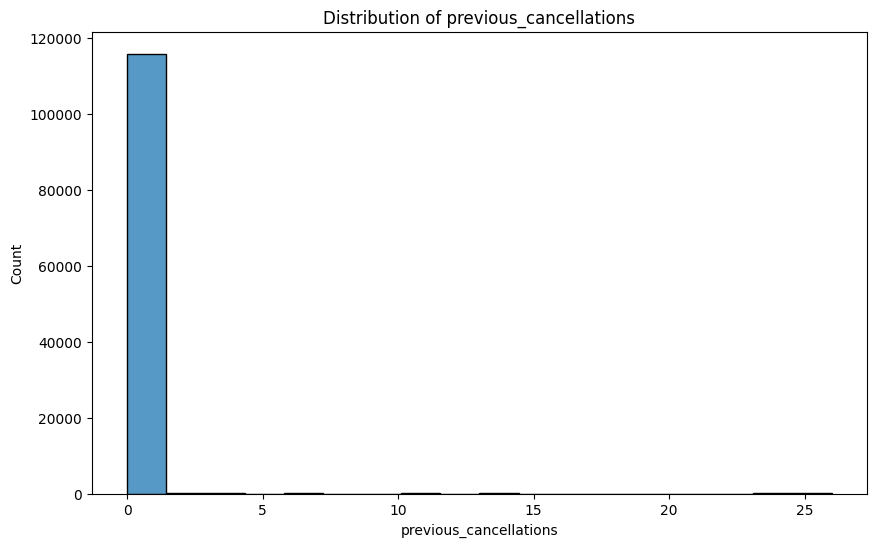

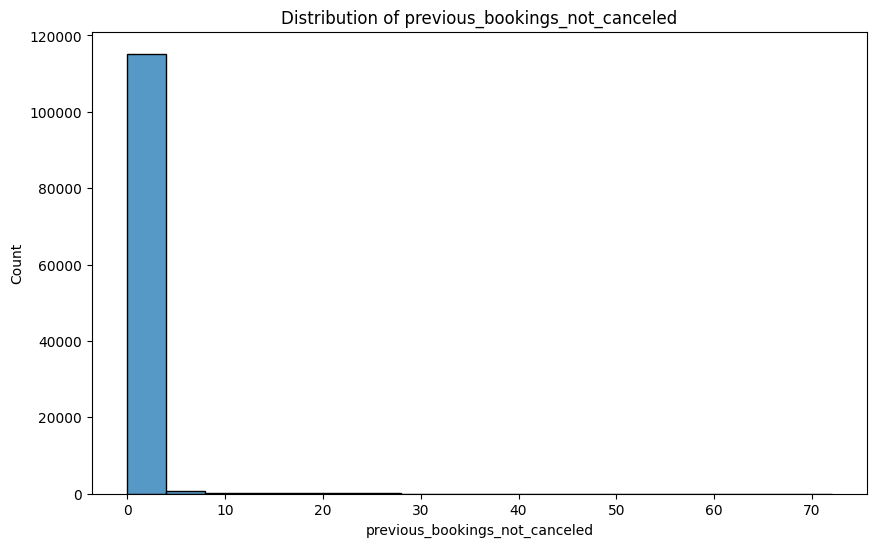

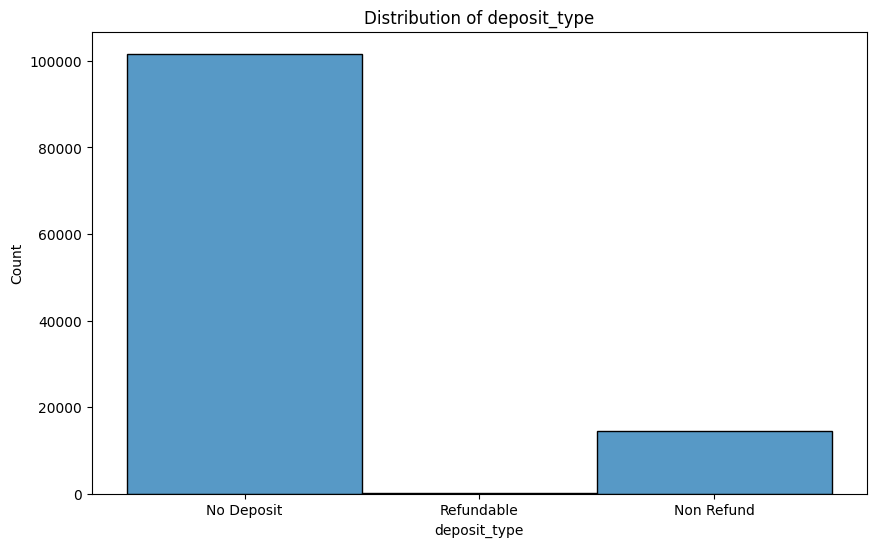

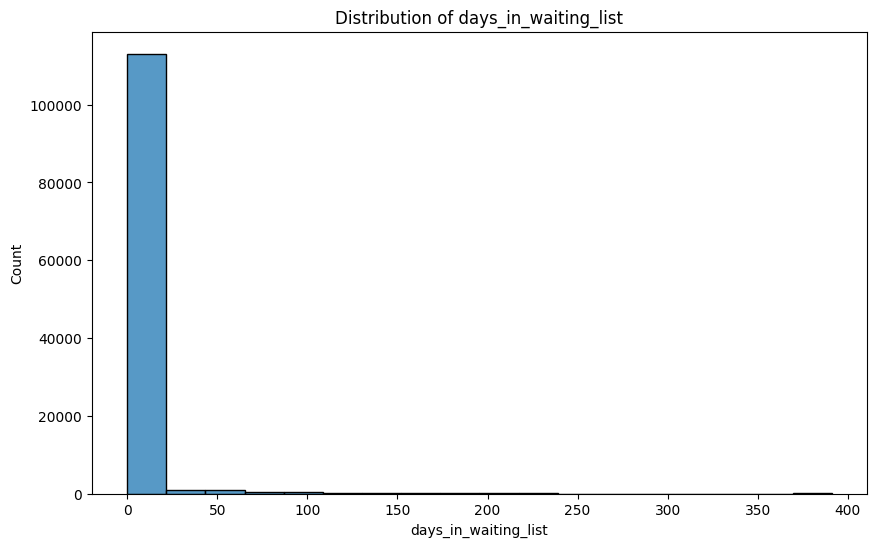

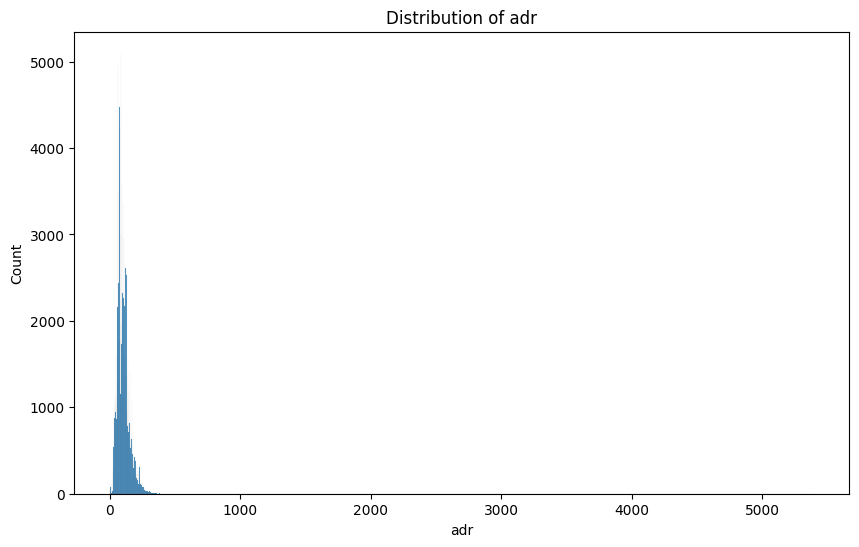

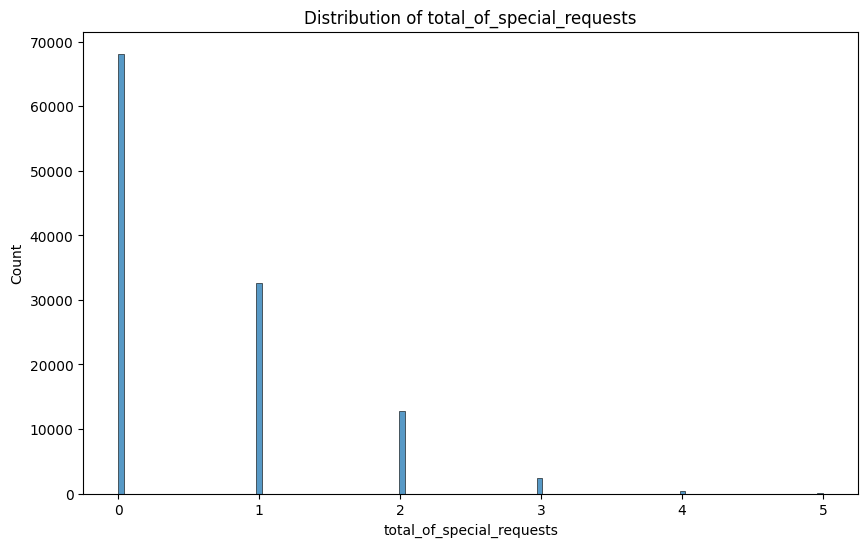

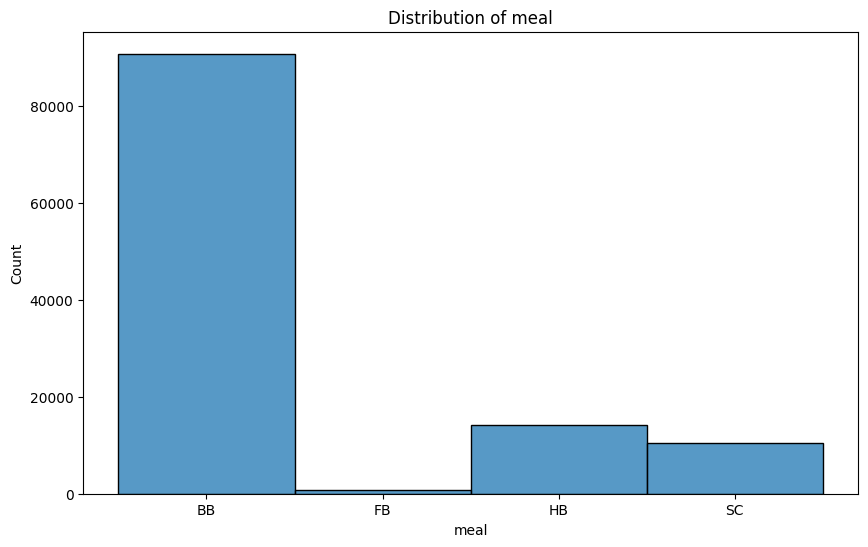

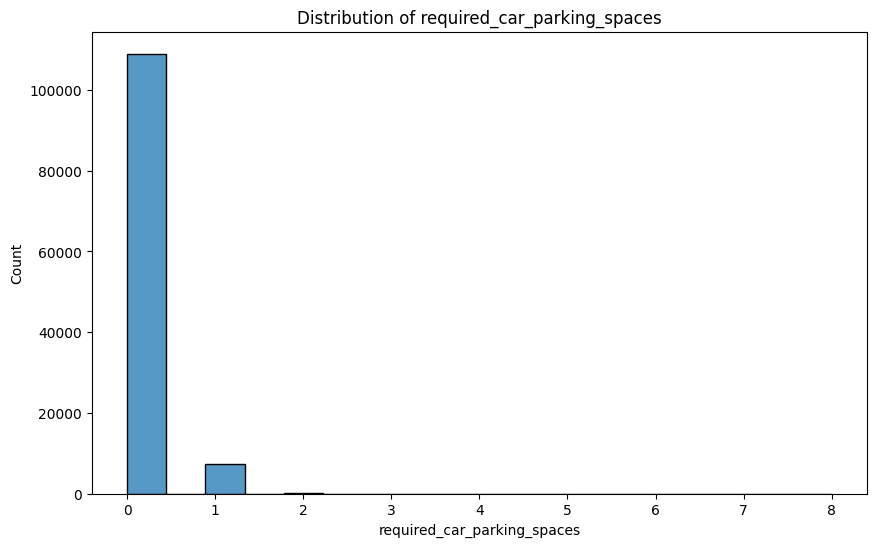

In [7]:
#Histogram for all numeric var 

for column in ['lead_time', 'stays_total_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'deposit_type', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'meal', 'required_car_parking_spaces']:
  plt.figure(figsize=(10, 6))
  sns.histplot(hotel[column], kde=False)
  plt.title(f'Distribution of {column}')
  plt.show()

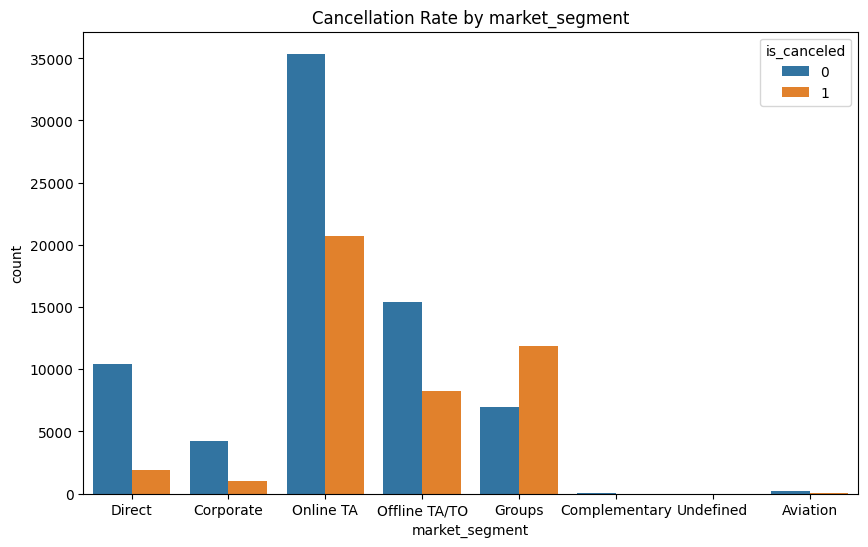

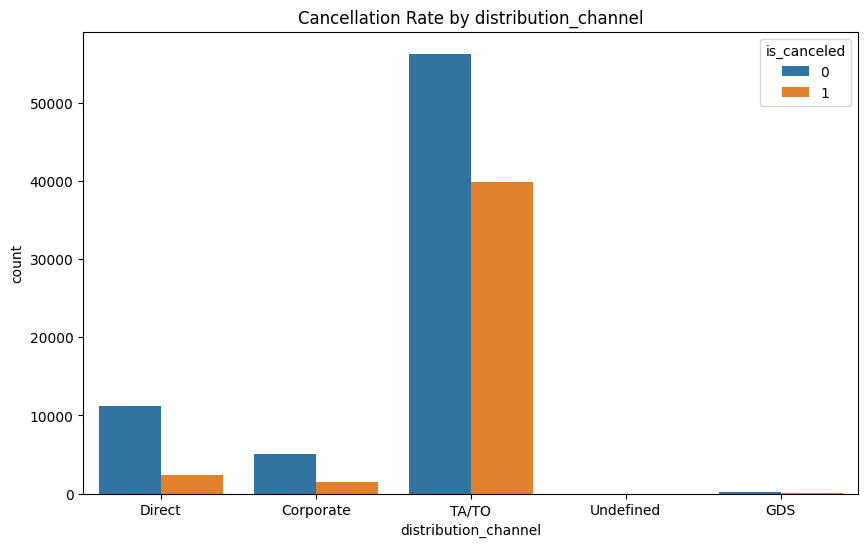

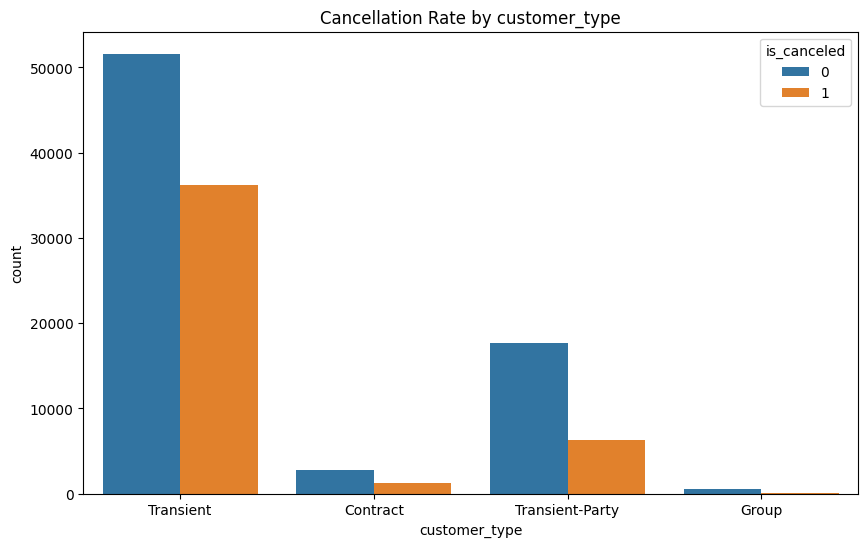

In [8]:
#Bar chart for catergorical var 

categorical_vars = ['market_segment', 'distribution_channel', 'customer_type']
for column in categorical_vars:
  plt.figure(figsize=(10,6))
  sns.countplot(data=hotel, x=column, hue= 'is_canceled')
  plt.title(f'Cancellation Rate by {column}')
  plt.show()